# Principal Components Analysis

**`PCA`** is fundamentally **`a dimensionality reduction algorithm`**, <br>
<br>
but it can also be useful as a tool:<br>
* for **visualization**, 
* for **noise filtering**, 
* for **feature extraction**
* for **engineering**, 
* and much more.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Using PCA in 2-D (?) to understand its concept.

Imagine a dataset with the following composition:

`np.random.RandomState()`:
* This way, you'll always get the same random number sequence  $\blacktriangleright$  if you run the same code again, you’ll get the exact same numbers
* Create your own instance of `numpy.random.RandomState()` with your chosen seed. Do not use `numpy.random.seed()`
* `Pseudo-random numbers` are computer generated numbers that appear random, but are actually predetermined.

In [2]:
rng = np.random.RandomState(seed=1)
'''
Create an array of the given shape and populate it with
random samples from a uniform distribution
over [0, 1)
'''
a = rng.rand(2, 2)
a

array([[4.17022005e-01, 7.20324493e-01],
       [1.14374817e-04, 3.02332573e-01]])

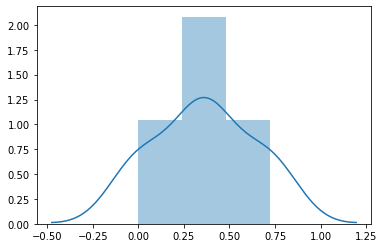

In [3]:
sns.distplot(a)

In [4]:
'''
random floats sampled from a univariate "normal" (Gaussian)
distribution of mean 0 and variance 1.
'''
b = rng.randn(2, 200)

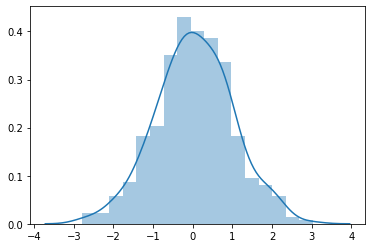

In [5]:
sns.distplot(b)

In [6]:
c= np.dot(a, b)
c

array([[-6.25301618e-01,  9.60695033e-01, -5.98543385e-01,
        -2.22805938e+00, -4.61430060e-01, -9.58929028e-01,
        -6.73079909e-01,  1.30501861e+00,  3.74545597e-01,
        -1.82628627e+00,  6.68262284e-01, -5.82646676e-01,
        -4.18128976e-01,  1.72209371e-01,  3.77116687e-01,
        -6.79396230e-01,  1.03148960e+00,  3.36041799e-01,
         7.05745985e-01,  8.39511547e-01,  1.49882898e+00,
         2.88356638e-01, -5.02935011e-01,  1.47921067e+00,
        -4.44382429e-01, -5.33464228e-01, -6.16229422e-01,
         7.46598965e-02, -1.13637011e-01, -2.00717298e-02,
         1.89582967e-01,  9.38466103e-01, -3.66697989e-01,
        -8.93528486e-01, -1.31759571e+00, -3.81802782e-01,
        -5.13790216e-01,  9.03737934e-01, -4.38875079e-01,
        -5.94170907e-01, -3.12943931e-01, -3.00229089e-01,
        -5.99239320e-01,  2.20370036e-01,  5.25164844e-01,
         5.56625011e-01,  1.35428157e+00, -6.83159806e-01,
        -1.23325109e-01, -3.13175458e-01, -2.48838277e+0

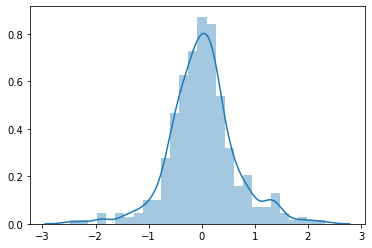

In [7]:
sns.distplot(c)

In [8]:
X =c.T
X

array([[-6.25301618e-01, -1.70063657e-01],
       [ 9.60695033e-01,  5.90900597e-01],
       [-5.98543385e-01, -4.02593393e-01],
       [-2.22805938e+00, -5.32576740e-01],
       [-4.61430060e-01, -4.98867244e-01],
       [-9.58929028e-01, -2.69331024e-01],
       [-6.73079909e-01, -3.38308547e-01],
       [ 1.30501861e+00,  5.91357846e-01],
       [ 3.74545597e-01, -9.85442049e-02],
       [-1.82628627e+00, -4.06170254e-01],
       [ 6.68262284e-01,  3.36877396e-01],
       [-5.82646676e-01, -1.77369217e-01],
       [-4.18128976e-01, -3.73811389e-01],
       [ 1.72209371e-01,  2.64668836e-01],
       [ 3.77116687e-01,  1.88442969e-01],
       [-6.79396230e-01, -1.31601978e-01],
       [ 1.03148960e+00,  4.25550018e-01],
       [ 3.36041799e-01,  3.90982721e-02],
       [ 7.05745985e-01,  4.88730649e-01],
       [ 8.39511547e-01,  1.52125872e-01],
       [ 1.49882898e+00,  4.71380809e-01],
       [ 2.88356638e-01,  3.31334714e-02],
       [-5.02935011e-01, -3.68665426e-01],
       [ 1.

In [9]:
X.shape

(200, 2)

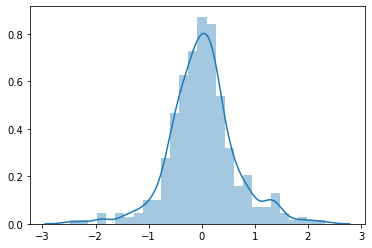

In [10]:
sns.distplot(X)

(-2.7339176659575735,
 2.574920899665639,
 -0.939772475576238,
 1.0115681482875458)

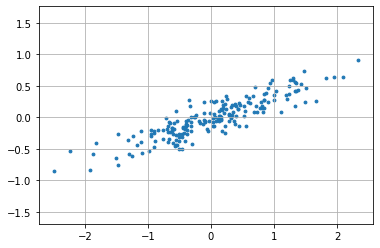

In [11]:
plt.scatter(
    x=X[:, 0],
    y=X[:, 1],
    alpha=1,  # The alpha blending value, between 0 (transparent) and 1 (opaque)
    s=8)
# The marker size

plt.grid()
plt.axis('equal')  # xmin, xmax, ymin, ymax = axis()

# 'equal'  Set equal scaling (i.e., make circles circular) by changing axis limits.

This dataset is comprised of two dimensions: <br>
* The <u>**first column**</u> is the `X[:,0]` (which, in the graph, is represented by the **x-axis**) and 
* the <u>**second column**</u>, `X[:,1]` (which, in the graph, is represented by the **y-axis**).

If we think about the information contained in this data, we could imagine that the axis where the information is <b>really</b> contained is neighter x nor the y axis. <br> It is, rather, an axis somewhere in between.

Text(2.329386000927877, 1.2163669216952258, 'direction of greater information')

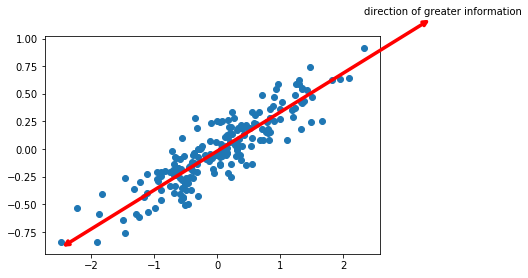

In [12]:
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=1)

# Annotate the point *xy* with text *text*
plt.annotate(
    s='direction of greater information',  # the text of the annotation
    xy=(min(X[:, 0]), min(X[:, 1] - .05)),  # the point (x, y) to annotate
    xytext=(max(X[:, 0]), max(X[:, 1] + 0.3)),
    arrowprops=dict(arrowstyle='<->', color='red', ls='-', lw=3.5))

Specifically, it seems to be a combination of both the first and second dimensions. Indeed, it is. 

The PCA algorithm will try to find the directions in which the most information is contained. <br> By information, we always mean to say - **`VARIANCE`**.

In [13]:
# variance of x-axis
np.std(X[:, 0])**2

0.678766717934191

In [14]:
# variance of y_axis
np.std(X[:, 1])**2

0.09833763148000234

Rather than attempting to *predict* the y values from the x values, the unsupervised learning problem attempts to learn about the *relationship* between your features (your `X`).

In principal component analysis, this relationship is quantified by finding a list of the *principal axes* in the data, and using those axes to describe the dataset.

## from sklearn.decomposition import PCA

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

The <b>fit method</b> learns some quantities from the data, most importantly the **`components`** and **`explained variance`**:

### pca.components_

In [16]:
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

What do these components mean?<br>
The first component is `pca.components_[0]`

In [17]:
pca.components_[0]

array([-0.94446029, -0.32862557])

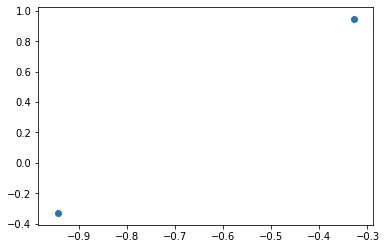

In [18]:
plt.scatter(pca.components_[0], pca.components_[1]);

In [19]:
df =pd.DataFrame(-0.94446029 * X[:, 0] - 0.32862557 * X[:, 1],
             columns=['component principal 1'])
df

,component principal 1
0,0.646460
1,-1.101523
2,0.697603
3,2.279332
4,0.599743
...,...
195,-0.883326
196,-0.291857
197,-2.056984
198,1.176573


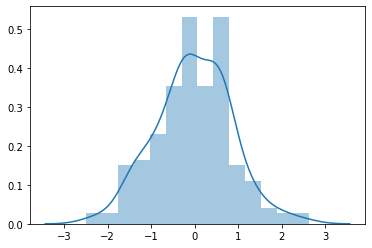

In [20]:
sns.distplot(df);

- The first component of a PCA method is always **the component that contains the most information**. <br> 
- What this component is doing is taking what is called as `a linear combination of the original columns`. <br>
- In this case, the results show that the PCA decided to take $-0.94$ of the first column (`X[:,0]`) and $-0.32$ of the second dimension (`X[:, 1]`). <br>

Let's take a look at the second component **`pca.components_[1]`**

In [21]:
pca.components_[1]

array([-0.32862557,  0.94446029])

- This is telling us that **`the second component`** of our data (**the second most important combination of features**) is comprised by taking the first dimension and multiplying it by $-0.32$ and taking the second dimension and multiplying it by $0.94$.

### pca.explained_variance_    /   pca.explained_variance_ratio

- Another important aspect of the results is the `explained_variance`.<br> 
- It can be obtained by the `pca.explained_variance` attribute.

In [22]:
pca.explained_variance_

array([0.7625315, 0.0184779])

In [23]:
print(pca.explained_variance_ratio_)

[0.97634101 0.02365899]


In [24]:
pca.components_[0]

array([-0.94446029, -0.32862557])

For this case, we observe that only 1 component explains `~97% of the variance` (information) in our data.<br>
It means that you can reduce the number of dimensions to 1, and it will still retain ~97% of its signal.

To see what these numbers mean, let's **visualize them as vectors** over the input data, using:<br>
- the **`components`** to define the **direction of the vector**, and <br>
- the **`explained variance`** to define the **squared-length of the vector**:

[ 0.03351168 -0.00408072] [-2.4406829  -0.86497833]
[ 0.03351168 -0.00408072] [-0.10050192  0.38107044]


(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593763,
 1.0195904306706842)

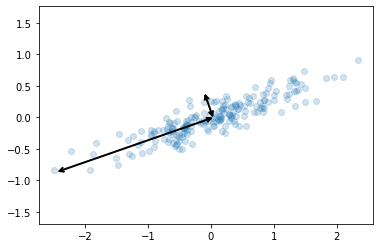

In [32]:
def draw_vector(v0, v1, ax=None):
    # Get the current figure matching
    ax = ax or plt.gca()
    
    # argument for the ax.annotate below
    arrowprops = dict(arrowstyle='<->',
                      color='k',
                      linewidth=2,
                      shrinkA=0,
                      shrinkB=0)
    print(v0, v1)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

    
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)


# plot vectors that represent principal axes of the data
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
    
plt.axis('equal')

- These vectors represent the *principal axes* of the data, and <br>
the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, <br>
it is a measure of the variance of the data when projected onto that axis.<br>
- The projection of each data point onto the principal axes are the "principal components" of the data.

If we plot these principal components beside the original data, we see the plots shown here:

array([[ 6.76769235e-01,  5.97386015e-02],
       [-1.07121393e+00,  2.57240064e-01],
       [ 7.27912364e-01, -1.68669939e-01],
       [ 2.30964136e+00,  2.44066575e-01],
       [ 6.30052323e-01, -3.04655713e-01],
       [ 1.02448887e+00,  7.56230140e-02],
       [ 7.77183507e-01, -8.34608477e-02],
       [-1.39656414e+00,  1.44518385e-01],
       [-2.91049874e-01, -2.01289478e-01],
       [ 1.88864221e+00,  2.31419563e-01],
       [-7.11544293e-01,  1.13426118e-01],
       [ 6.38884130e-01,  3.88212853e-02],
       [ 5.48059617e-01, -2.00775267e-01],
       [-2.19312436e-01,  2.08243673e-01],
       [-3.87789490e-01,  6.89135848e-02],
       [ 7.15219956e-01,  1.13841003e-01],
       [-1.08373816e+00,  7.78081042e-02],
       [-2.99917403e-01, -5.86382919e-02],
       [-7.96849021e-01,  2.44527383e-01],
       [-8.12568346e-01, -1.17341246e-01],
       [-1.54018281e+00, -3.24862050e-02],
       [-2.52920476e-01, -4.86012463e-02],
       [ 6.26464454e-01, -1.68045678e-01],
       [-1.

In [27]:
pc1 = pca.transform(X)[:,0]
pc2 = pca.transform(X)[:,1]

[ 0.03351168 -0.00408072] [-2.4406829  -0.86497833]
[ 0.03351168 -0.00408072] [-0.10050192  0.38107044]
[0 0] [ 2.61969149e+00 -1.60409840e-16]
[0 0] [4.99411294e-17 4.07800269e-01]


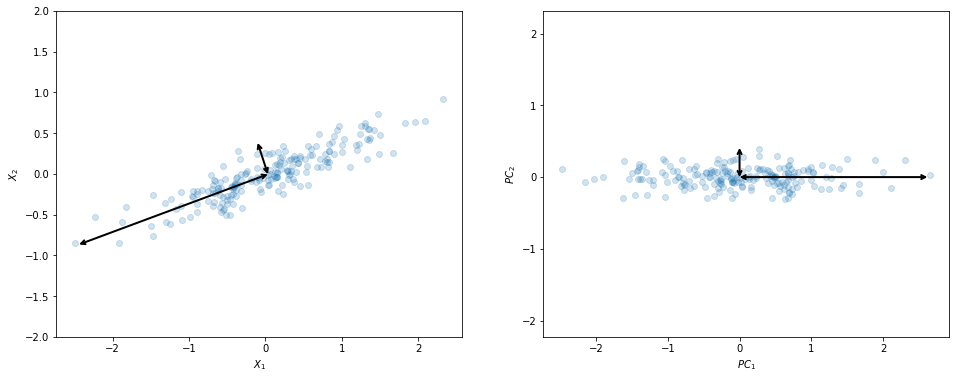

In [33]:
# plot data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

#ax1
ax1.scatter(X[:, 0], X[:, 1], alpha=0.2)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax1)
    
ax1.set_ylim([-2,2])

# ax2
ax2.scatter(pc1, pc2, alpha=0.2, )
count = 0
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    count += np.pi/2
    draw_vector(np.array([0, 0]) , np.array([np.sin(count) * np.sqrt(length) * 3, -np.cos(count) * np.sqrt(length) * 3]) , ax=ax2)

    
ax1.set_xlabel('$X_1$')
ax1.set_ylabel('$X_2$')

ax2.set_xlabel('$PC_1$')
ax2.set_ylabel('$PC_2$')
plt.axis('equal');

- So what the PCA has done was effectively rotate the original features into a new dimension that was more suitable.<br>
- Now, you have at the x-axis a variable that contains most of the information, and at the y-axis a variable that contains the following most information (although in this case it is so small).